# Logistic Regression


# import libraries

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# load the dataset titanic

In [5]:
# load the dataset titanic
df=sns.load_dataset('titanic')

In [6]:
# show first five row and columns
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# show last five row and columns
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
# show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# show data summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# checn null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# fill null values age with mean
df['age'].fillna(df['age'].mean(), inplace=True)

In [12]:
# fill null values with embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [13]:
# fill null values embark_town  with mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [14]:
# drop deck column
df.drop('deck', axis=1, inplace=True)

In [15]:
# check for missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Text(0.5, 1.0, 'Scatter Plot of Age vs Fare')

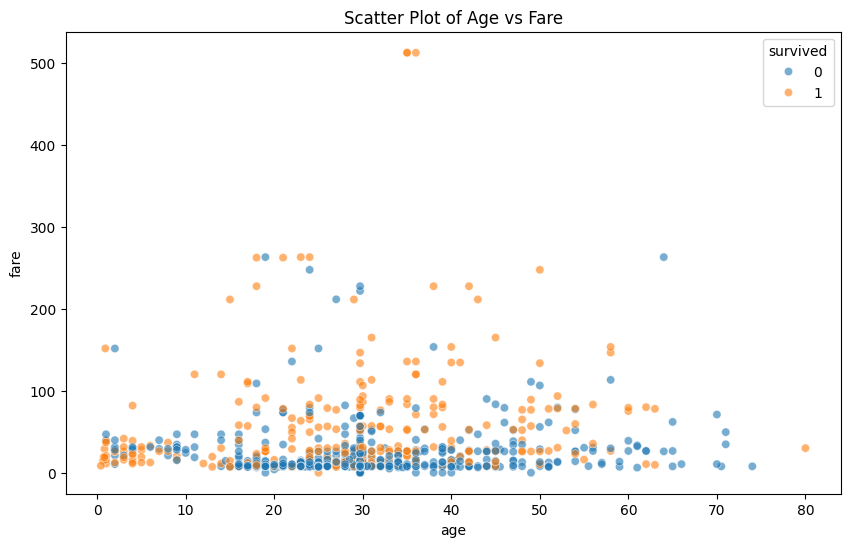

In [16]:
# show scatter plot for age and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')

Text(0, 0.5, '')

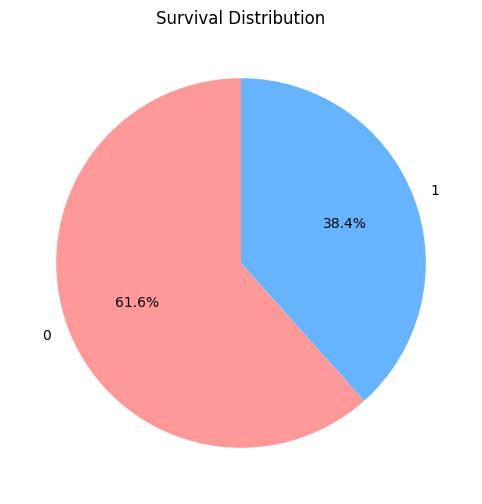

In [17]:
# pie chart for survived
plt.figure(figsize=(8, 6))
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Survival Distribution')
plt.ylabel('')

Text(0.5, 1.0, 'Box Plot of Age')

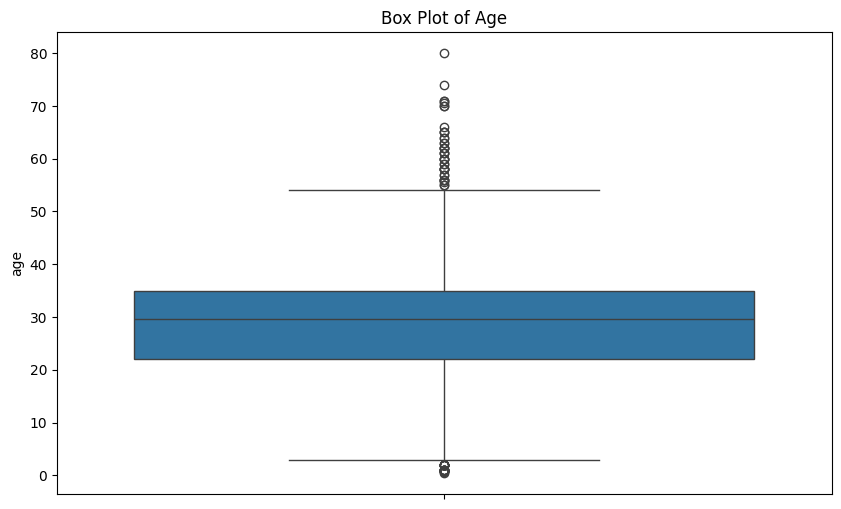

In [18]:
# check outliers for age column in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', data=df)
plt.title('Box Plot of Age')

In [19]:
# Remove outliers in age column for  IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)   
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot of Age After Removing Outliers')

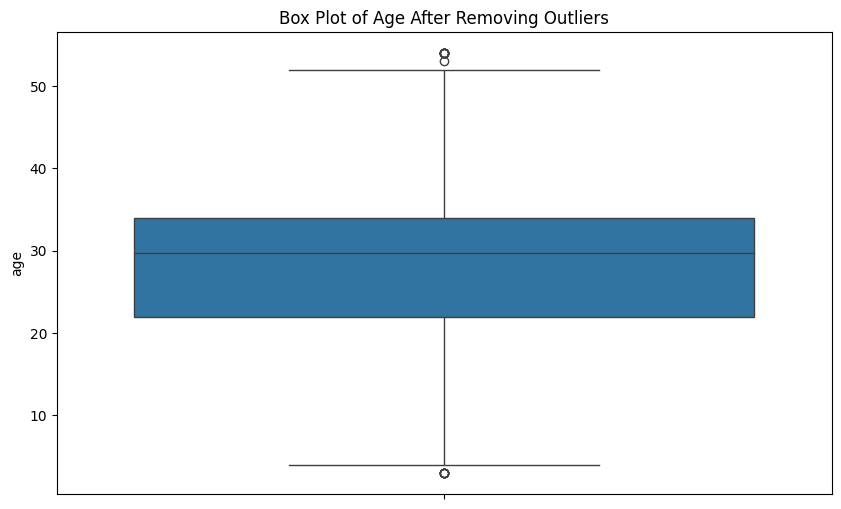

In [20]:
# again check for outliers in age column in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', data=df)
plt.title('Box Plot of Age After Removing Outliers')

Text(0.5, 1.0, 'Box Plot of Fare')

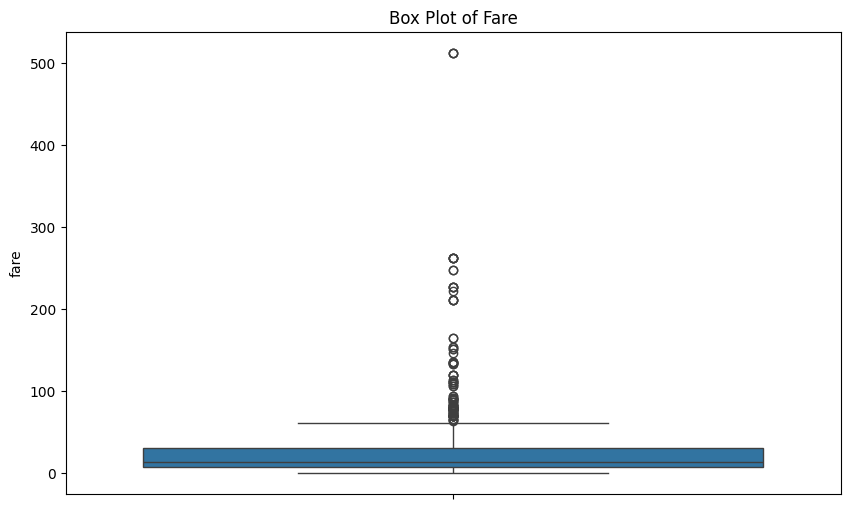

In [21]:
# check outliers in  fare column in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='fare', data=df)
plt.title('Box Plot of Fare')

In [22]:
# Remove outliers in fare column for IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot of Fare After Removing Outliers')

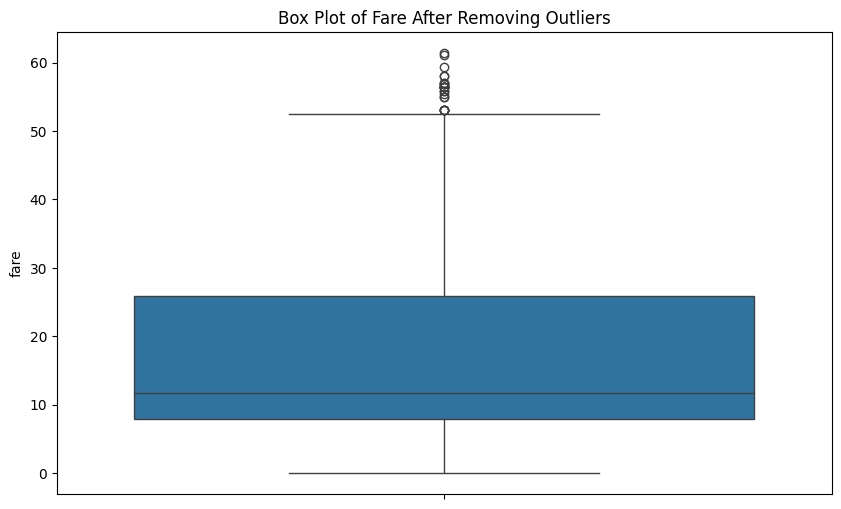

In [23]:
# check for outliers in fare column in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='fare', data=df)
plt.title('Box Plot of Fare After Removing Outliers')

# Encode the data category to numeric

In [24]:
from sklearn.preprocessing import LabelEncoder

# encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,True,2,0,False
2,1,3,0,26.000000,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.000000,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.000000,0,0,8.0500,2,2,1,True,2,0,True
5,0,3,1,29.699118,0,0,8.4583,1,2,1,True,1,0,True


# seperate the data x and y

In [25]:
x = df.drop('survived', axis=1)
y = df['survived']

In [26]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,True,2,0,False
2,3,0,26.000000,0,0,7.9250,2,2,2,False,2,1,True
3,1,0,35.000000,1,0,53.1000,2,0,2,False,2,1,False
4,3,1,35.000000,0,0,8.0500,2,2,1,True,2,0,True
5,3,1,29.699118,0,0,8.4583,1,2,1,True,1,0,True


In [27]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: survived, dtype: int64

In [28]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# model training
model = LogisticRegression()

In [30]:
# train the model
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
# predict the test set
y_pred = model.predict(x_test)

In [32]:
# accuracy score confused matrix and classification report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[95  0]
 [ 0 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        49

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



<Axes: >

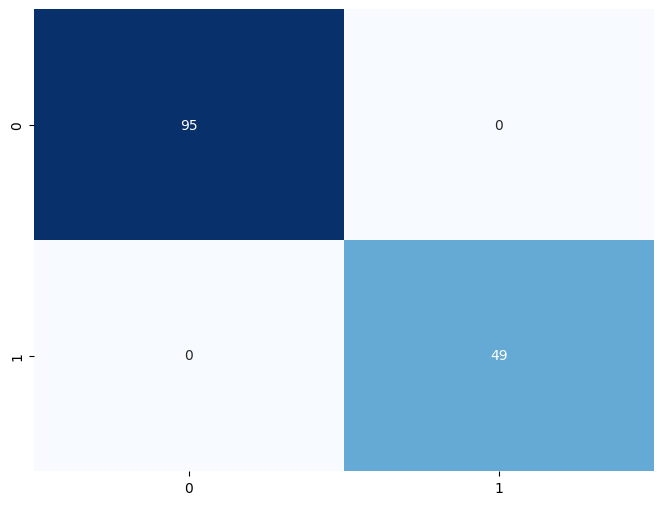

In [33]:
# confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)

# save the model

In [34]:
# save the model
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']